# Lab 5

- input a nucleic acid sequence
- run RNA fold (from ViennaRNA package) to obtain a secondary structure and get a graphical representation of the folded RNA
- Fold RNAs pulled from a recent publication 
- compare structures to those provided
- **Do the sequences fold the way the authors say they do?**

**STEPS**
1. Find where the sequences from the paper are located
     - The sequences you want are: YES-1 riboswitch from Figure 2a, the NOT-1 riboswitch in Figure 4a, the AND-1 riboswitch in Figure 5a, and the OR-1 riboswitch in Figure 6a
2. For each riboswitch(sequence), produce a table with the following fields: 
    - riboswitch name
    - start and end coordinates of OBS-1 (blue region)
    - start and end coordinates of OBS-2 (blue region, only applicable to AND-1 and OR-1)
    - start and end coordinates of the two red regions
3. Design a routine that runs RNAfold in python, run it in terminal first. Make sure it works
    - write a function 
4. Check for rns.ps in your current working directory
5. NOTE: you will not be able to open .ps file in the jupyter home interface. Try converting it to pdf using ps2pdf, then displaying it in your notebook using IPython.display.IFrame. 
 
*once you get the images from RNAfold, add them to your markdown section


1. Will the AND-1 riboswitch cleave itself when both of its OBS are bound? 
    - Yes, it will cleave itself, but it will be a really low self-cleavage
2. Will the OR-1 riboswitch cleave itself when neither of its OBS are bound? 
    - In the absence of the OBS bound, there will be little self-cleavage
3. What behavior do we expect from the YES-1 riboswitch? 
    - It is predicted that they will form the OFF and ON formations regardless of the DNA

In [239]:
import subprocess
#import RNA
from IPython.display import Image
import sqlite3
from Bio import SeqIO
from Bio.Seq import Seq
from wand.image import Image as WImage

- ***Subprocess*** allows you to access functions with the arg input and run the code that way. In the example below it is running by calling the MUSCLE function. The muscle function takes a sequence and aligns it. 
- ***RNA*** allows us to call RNAfold into our subprocess function
- ***Ipythondisplay*** allows us to display screenshots of the riboswitch sequences from the paper in the following order: YES-1, NOT-1, AND-1, and OR-1
    - You can get the sequence for each respected riboswitch by simply reading the screenshot

## Sequences:

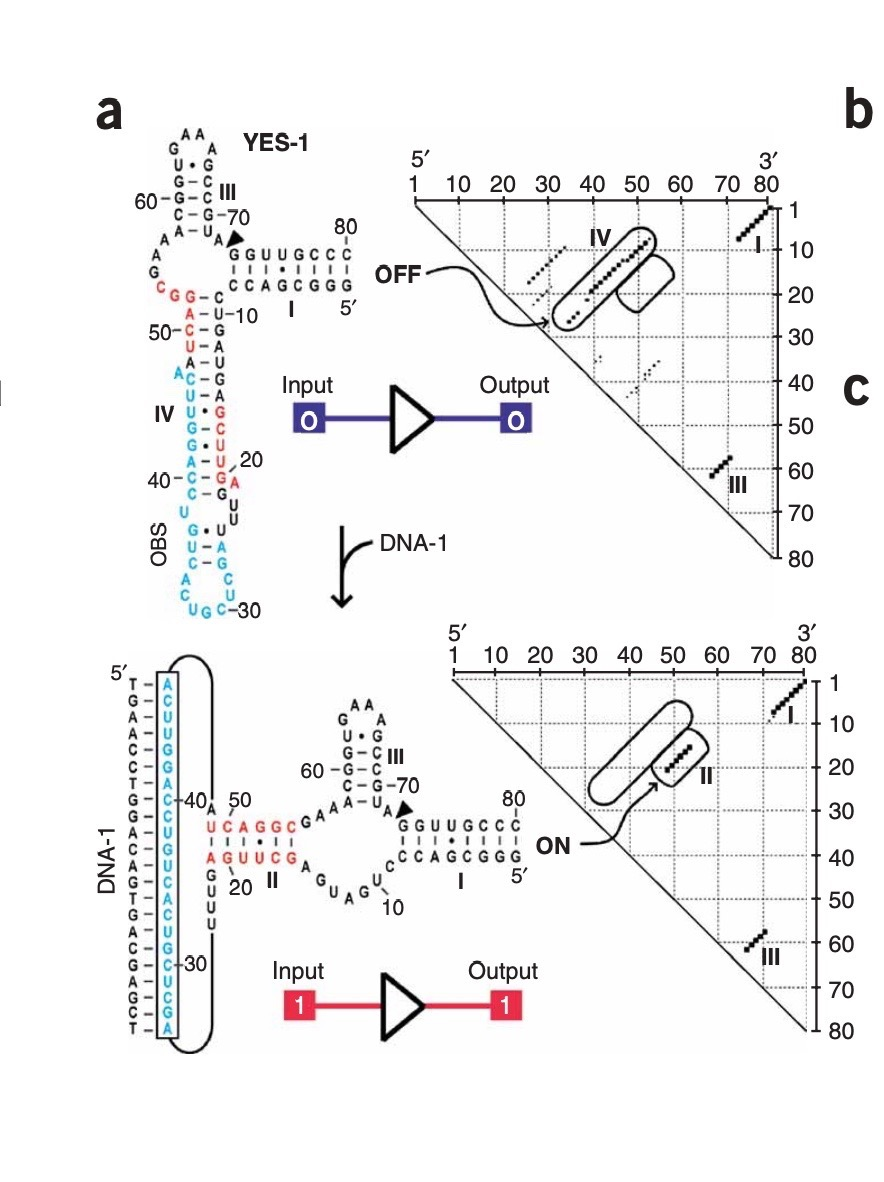

In [240]:
Image('pic.jpg',width=450)

In [241]:
YES1= 'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'

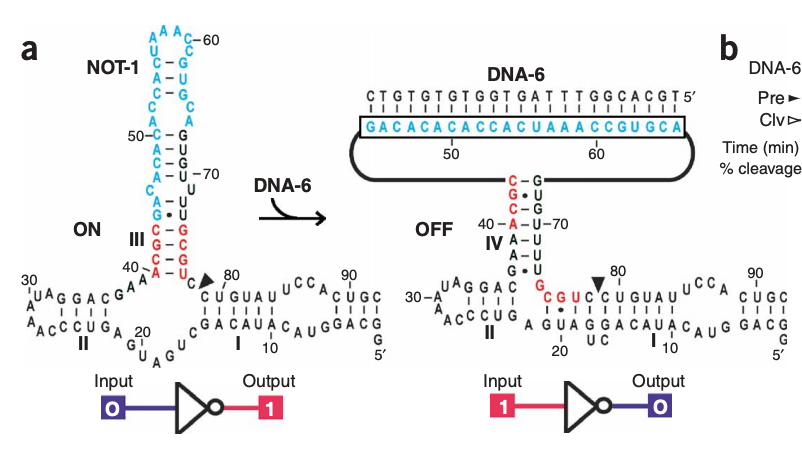

In [242]:
Image('pic2.png',width=500)

In [243]:
NOT1='GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC'

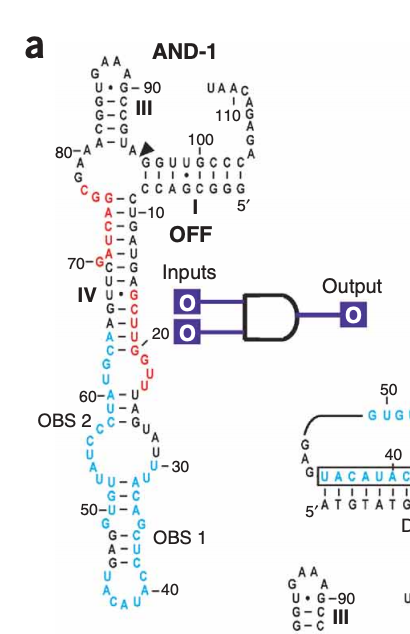

In [244]:
Image('Screen.png',width=300)

In [245]:
AND1= 'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU'

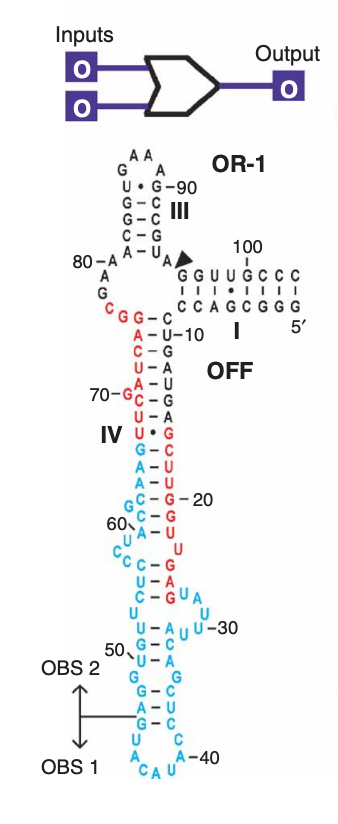

In [246]:
Image('or.png', width=200)

In [247]:
OR1= 'GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'

## Table:
| Riboswitch Name| Start Coordinate of OBS-1 | End Coordinate of OBS-1 | Start Coordinate of OBS-2 | End Coordinate of OBS-2 | Start Coordinate of Red | End Coordinate of Red |
| --- | --- | --- | --- | --- | --- | --- |
| YES-1 |26| 47 | NA | NA | (16, 49) | (21, 54) | 
| NOT-1 | 44 | 66 | NA | NA | (40, 74) | (43, 77) | 
| AND-1 | 30 | 45 | 49 | 64 | (16, 70) | (23, 77) | 
| OR-1 | 27 | 46 | 47 | 66 | (16, 67) | (26, 77) | 

## Function:

In [248]:
seqs= [YES1, NOT1,AND1, OR1]

import subprocess
folds= []

for i in range(4):
    
    p= subprocess.run(['RNAfold'], input= bytes(seqs[i], 'ascii'), 
       stdout= subprocess.PIPE, stderr= subprocess.PIPE)
    fold = p.stdout.decode()
    listfold=fold.split()
    goal= listfold[1]
    folds.append(goal)

In [249]:
Y= folds[0]
N= folds[1]
A= folds[2]
O= folds[3]
print( "YES1:")
print(Y)
print('NOT1:')
print(N)
print('AND1:')
print(A)
print('OR1:')
print(O)

YES1:
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).))))))))
NOT1:
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....))))
AND1:
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).)))))))).........
OR1:
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).))))))))


## Secondary Structures:

In [250]:
RNAseqs= [">YES1" + "\n" + YES1 + "\n" + Y , ">NOT1" + "\n" + NOT1 + "\n" + N, 
          ">AND1" + "\n" + AND1 + "\n" + A, ">OR1" + "\n" + OR1 + "\n" + O]

for i in range(4):
    
    p= subprocess.run(['RNAplot'], input= bytes(RNAseqs[i], 'ascii'), 
       stdout= subprocess.PIPE, stderr= subprocess.PIPE)


In [251]:
name1= 'YES1'
name2= 'NOT1'
name3= 'AND1'
name4= 'OR1'
im1 = subprocess.call('convert YES1_ss.ps %s.png' %name1 , shell = True)
im2 = subprocess.call('convert NOT1_ss.ps %s.png' %name2 , shell = True)
im3= subprocess.call('convert AND1_ss.ps %s.png' %name3 , shell = True)
im4= subprocess.call('convert OR1_ss.ps %s.png' %name4 , shell = True)

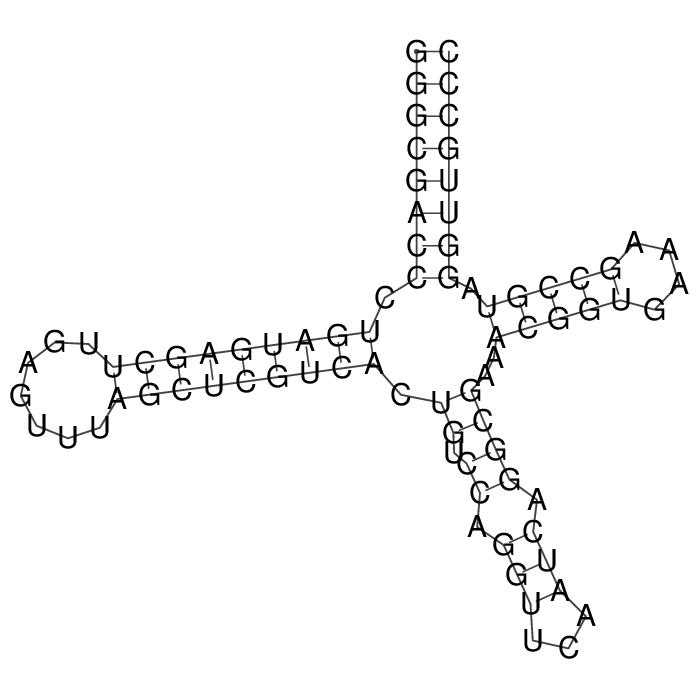

In [252]:
Image('YES1.png', width=500)

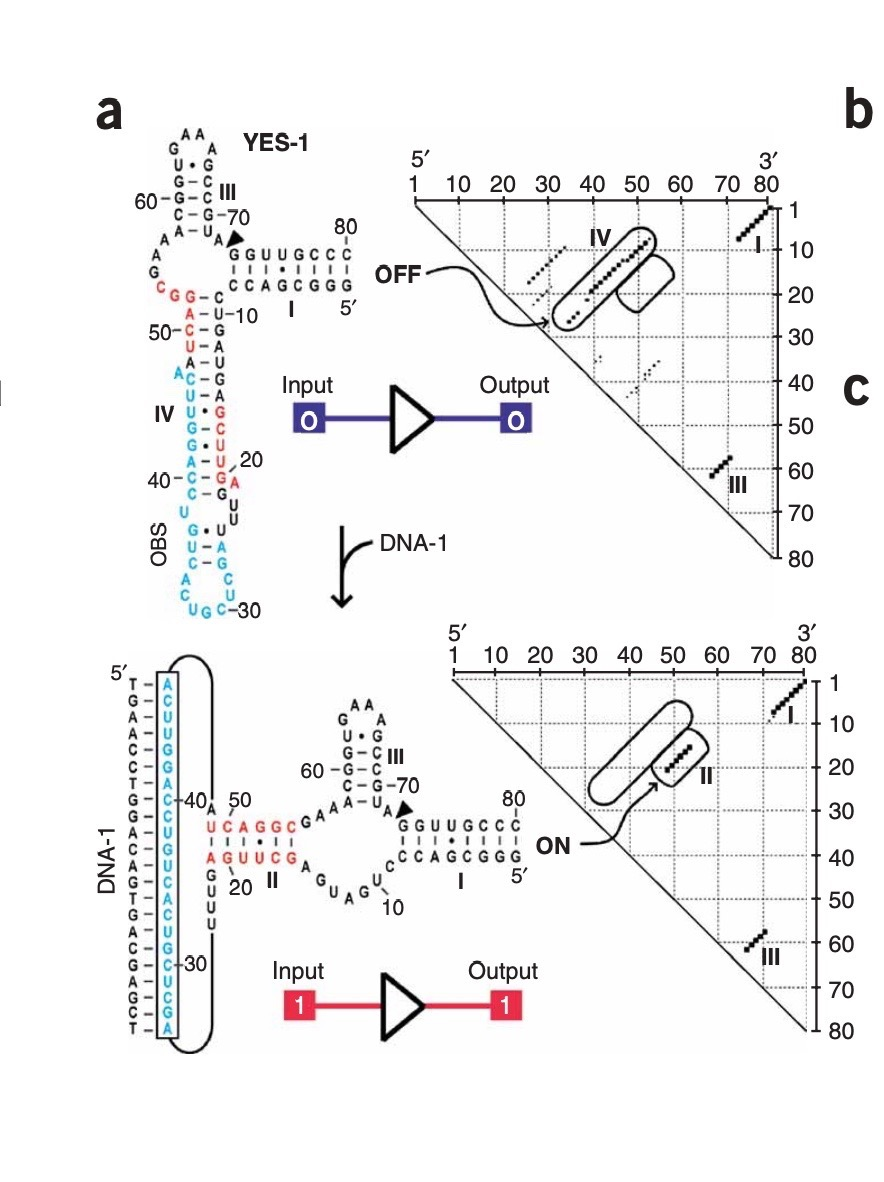

In [253]:
Image('pic.jpg',width=450)

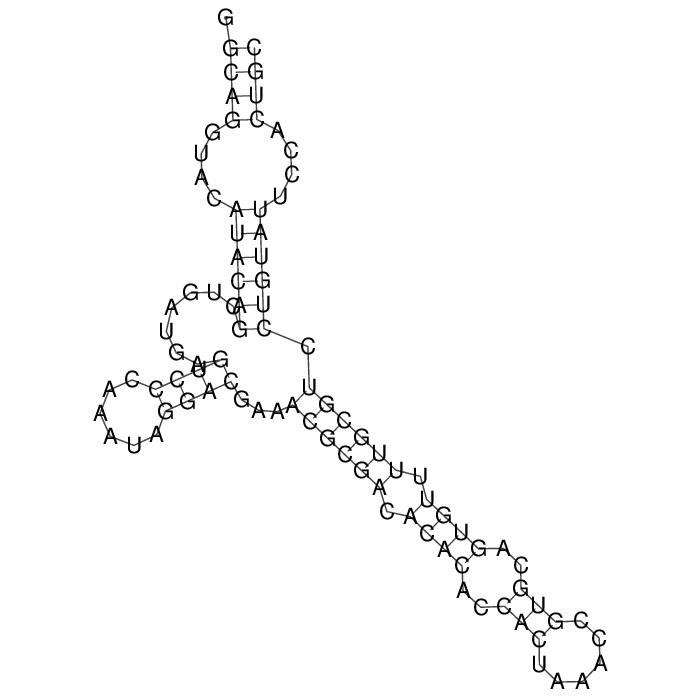

In [226]:
Image('NOT1.png', width=500)

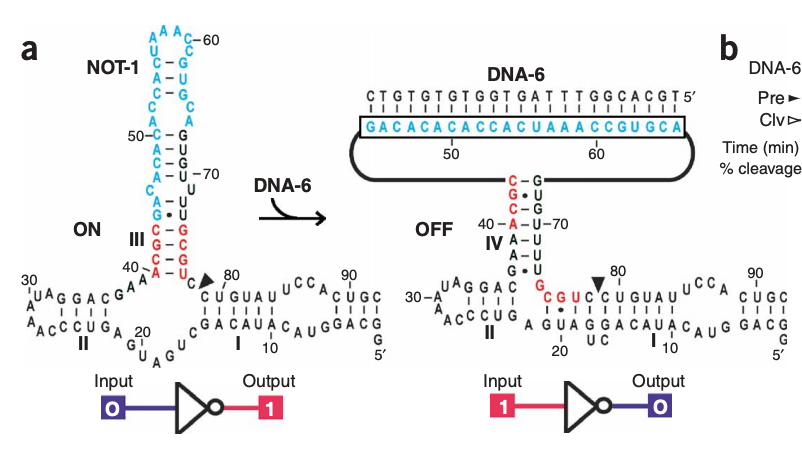

In [254]:
Image('pic2.png',width=500)

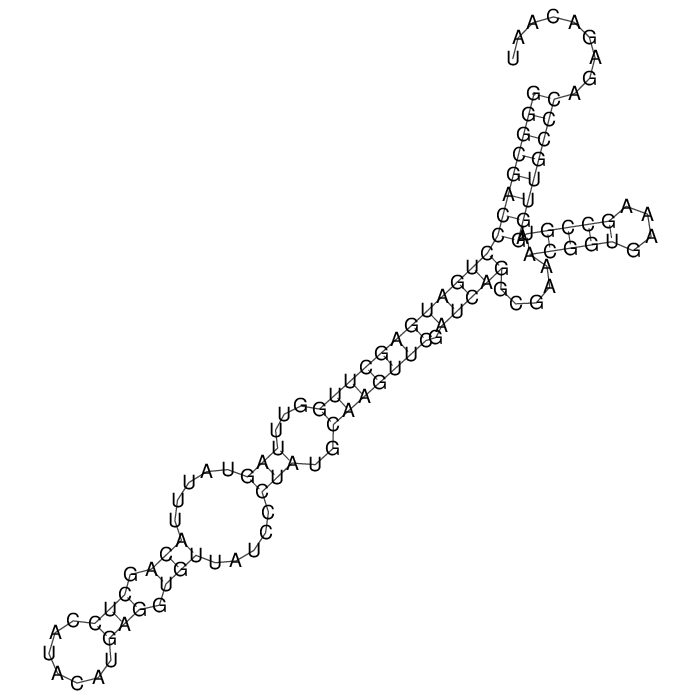

In [227]:
Image('AND1.png', width=500)

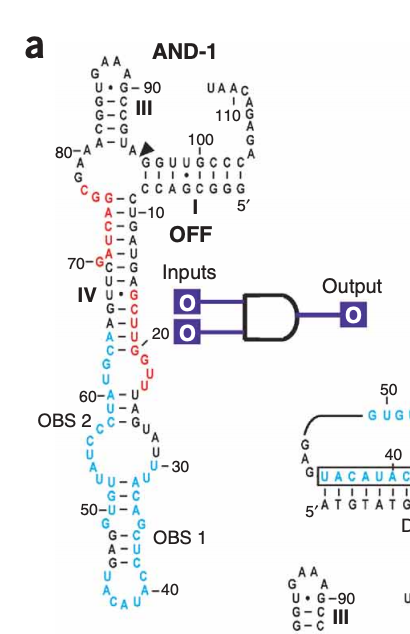

In [255]:
Image('Screen.png',width=300)

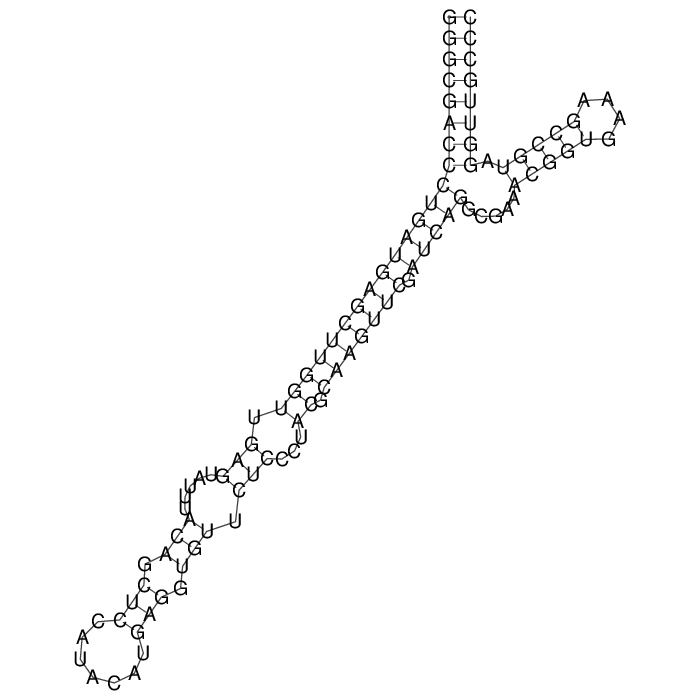

In [228]:
Image('OR1.png', width=500)

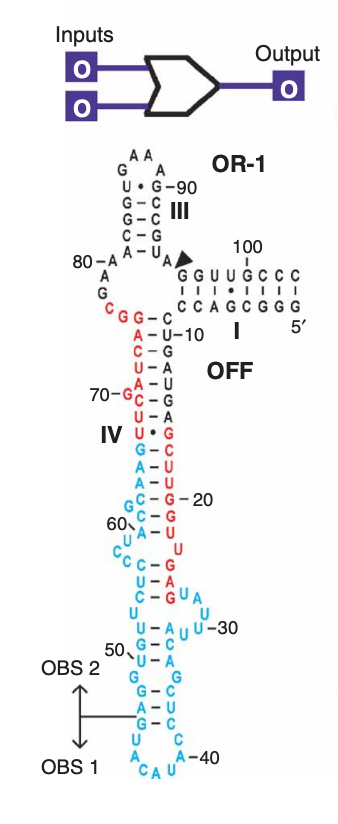

In [256]:
Image('or.png', width=200)

1. Are they the same?
    - NOT1, OR1, and AND1are the same, for the most part
2. Are they different?
    - YES1 is distinctly different
3. Are there any stem-loop structures that donâ€™t match up? 
    - The reason why YES1 is distinctly differnet is because some of its stem loops do not add up, So yes there are stem-loop structures that do not match
4. What might explain the differences?
    - For YES1 I think that  the difference occurred because regardless of its surroundings, it was predicted to confirm. Meaning that since our surroundings are slightly different the confirmation would be slightly different as well with the secondary structures appearing in different areas than before
5. See if you can track down the parameters the authors used and compare them to the default RNAfold parameters (e.g., temperature, algorithm, etc)
    - "The algorithm computes the entire ensemble of possible secondary structures as a function of temperature45, which allows the user to choose to build only those constructs that are predicted to exhibit the desired molecular switch characteristics"

### Simmulation of OBS Binding:

In [435]:
x=''
for i in range(22):
    i='x'
    x= x+ i

In [436]:
YES1C= YES1[0:25] + x + YES1[47:80] + '\n' + "@"

In [437]:
y= ''
for i in range(22):
    i= 'x'
    y= y + i

In [438]:
NOT1C= NOT1[0:43] + y + NOT1[65:92]

In [439]:
z=''
for i in range(15):
    i='x'
    z= z+ i

In [440]:
AND1C= AND1[0:29] + z + AND1[44:112]

In [441]:
w=''
for i in range(19):
    i='x'
    w= w+ i

In [442]:
OR1C= OR1[0:26] + w + OR1[45:103]

In [443]:
f= open("YES1.text", "+w")
f1= open("NOT1.text", "+w")
f2= open("AND1.text", "+w")
f3= open("OR1.text", "+w")

In [444]:
with open("%s.txt" %name, "w") as f: 
    f.write(YES1C)

In [445]:
with open("%s.txt" %name, "w") as f: 
    f.write(NOT1C)

In [446]:
with open("%s.txt" %name, "w") as f: 
    f.write(AND1C)

In [447]:
with open("%s.txt" %name, "w") as f: 
    f.write(OR1C)

In [448]:
def OBS(name, seq, eman):
    p= subprocess.run(['RNAfold', '-C', eman ],
                  stdout= subprocess.PIPE,
                  stderr= subprocess.PIPE)
    output= p.stdouot.decode()
    outputs =output.split()
    nex= outputs[0]
    znex= outputs[1]
    plotin = ">" + name + "\n" + nex + "\n" + znex + '\n' + '@';
    print(plotin)
    
    p2= subprocess.run(['RNAplot'],
                       input= bytes(plotin, 'ascii'),
                       stdout= subprocess.PIPE,
                       stderr= subprocess.PIPE)
    name= name + '_ss'
    
    p2= subprocess.call('convert %s.ps %s.png' %(name, name), shell= True )

***for this function:***
- the first input is a string of the name, second input is a string of the sequence with the constraint, and the third input is a string of your text file name 
- it returns the image of the folded sturctures with the constraint taken into account

Does the AND1 and OR1 work as the paper claims they would?
    - Yes they do, there is little cleavage and confirmations surrounding them.